In [62]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import norm
import os
import warnings
import upsetplot

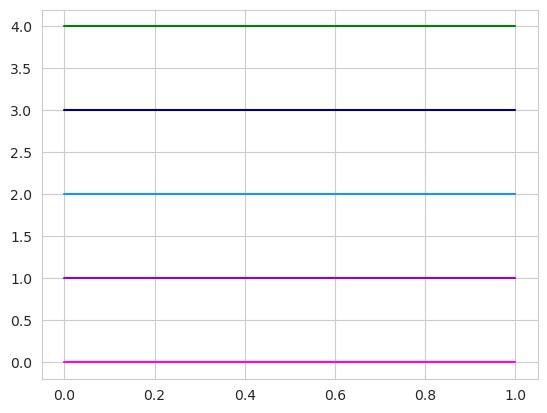

In [63]:
colors = ['fuchsia',
          'darkviolet',
          'dodgerblue',
          'mediumspringgreen',
          'g']

colors = ['fuchsia',
          'darkviolet',
          'dodgerblue',
          'navy',
          'g']

#colors = colors[:3]

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colors)

for i in range(len(colors)):
    plt.plot([0, 1], [i, i])

plt.show()

new_cmap = mpl.colors.ListedColormap(colors)

colors2 = [c for c in colors]
colors2.insert(0, 'k')
new_cmap2 = mpl.colors.ListedColormap(colors2)

In [64]:
os.chdir('/project/ssverma_shared/projects/Endometriosis/Endo_Subtyping_Heterogeneity/Cluster_Heterogeneity/')

In [65]:
rahmioglu_b38 = pd.read_table('../Locus_Extraction/Rahmioglu_snps_b38.bed', index_col=3, header=None)
# rahmioglu_b38 = rahmioglu_b38.rename({'rs7334326': 'rs9568405'})
# rahmioglu_b38.loc['rs9568405', 1] = 50405519
rahmioglu = pd.read_csv('Rahmioglu_processed_signals.csv', index_col='Lead SNP').rename(columns={'Unnamed: 0': 'Signal'})
# rahmioglu = rahmioglu.rename({'rs7334326': 'rs9568405'})

rahmioglu['Position (b38)'] = rahmioglu_b38.loc[rahmioglu.index.intersection(rahmioglu_b38.index), 1]
rahmioglu['START'] = rahmioglu['Position (b38)'] - 5E5
rahmioglu['STOP'] = rahmioglu['Position (b38)'] + 5E5
rahmioglu = rahmioglu[~rahmioglu['Chr'].isin(['X'])]
rahmioglu['Chr'] = rahmioglu['Chr'].astype(int)

rahmioglu[['Chr', 'Position (b38)', 'START', 'STOP']] = rahmioglu[['Chr', 'Position (b38)', 'START', 'STOP']].astype(float)

print(len(rahmioglu))
rahmioglu = rahmioglu.dropna(subset=['Infertility_OR'])
print(len(rahmioglu))

sig_line = 0.05 / len(rahmioglu)
print(sig_line)
rahmioglu

41
39
0.001282051282051282


,Signal,Chr,Position (hg19),Overall_OR,Overall_P,EUR_RAF,EUR_OR,EUR_P,JPT_RAF,JPT_OR,...,Stage34_OR_CI,Stage34_BETA,Stage12_OR_CI,Stage12_BETA,Infertility_OR_CI,Infertility_BETA,Risk_Allele,Position (b38),START,STOP
Lead SNP,,,,,,,,,,,,,,,,,,,,,
rs10917151,WNT4/1p36.12,1.0,22422721.0,1.14,5.08x10-44,0.16,1.14,3.64x10-41,0.57,1.27,...,(1.16-1.31),0.207014,(1.08-1.24),0.148420,(1.13-1.31),0.190620,A,22096228.0,21596228.0,22596228.0
rs12030576,NGF/1p13.2,1.0,115817221.0,1.06,3.34x10-13,0.65,1.06,1.91x10-13,0.41,0.99,...,(0.97-1.08),0.029559,(1.02-1.15),0.086178,(0.98-1.11),0.039221,G,115274600.0,114774600.0,115774600.0
rs2040445,SLC19A2/1q24.2,1.0,169216412.0,1.17,1.40x10-10,0.97,1.17,1.96x10-10,NaN,NaN,...,(1.28-1.83),0.425268,(0.84-1.24),0.019803,(1.07-1.55),0.254642,G,169247174.0,168747174.0,169747174.0
rs2421985,DNM3/1q24.3,1.0,172099136.0,1.05,6.73x10-14,0.49,1.05,1.72x10-12,0.77,1.28,...,(1.04-1.14),0.086178,(0.97-1.07),0.019803,(0.96-1.07),0.009950,C,172129996.0,171629996.0,172629996.0
rs11674184,GREB1/2p25.1,2.0,11721535.0,1.08,3.16x10-26,0.61,1.08,5.91x10-24,0.54,1.25,...,(1.10-1.22),0.148420,(1.02-1.14),0.067659,(0.99-1.12),0.048790,T,11581409.0,11081409.0,12081409.0
rs1430787,ETAA1/2p14,2.0,67868498.0,1.04,9.65x10-9,0.31,1.04,4.56x10-8,0.22,1.17,...,(1.05-1.16),0.095310,(1.02-1.14),0.076961,(1.01-1.14),0.067659,A,67641366.0,67141366.0,68141366.0
rs6435157,BMPR2/2q33.1,2.0,203441224.0,1.05,4.97x10-8,0.77,1.05,1.12x10-7,0.97,1.42,...,(1.06-1.19),0.122218,(1.01-1.15),0.076961,(1.07-1.22),0.131028,T,202576501.0,202076501.0,203076501.0
rs1352889,BSN/3p21.31,3.0,49652148.0,1.05,2.79x10-8,0.17,1.05,2.79x10-8,NaN,NaN,...,(0.95-1.08),0.019803,(0.98-1.13),0.048790,(0.98-1.13),0.048790,T,49614715.0,49114715.0,50114715.0
rs1903068,KDR/4q12,4.0,56008477.0,1.08,1.55x10-24,0.68,1.08,1.78x10-24,0.88,1.09,...,(1.16-1.29),0.198851,(1.03-1.15),0.086178,(1.05-1.18),0.104360,A,55142310.0,54642310.0,55642310.0


In [66]:
snp_annot = pd.read_csv('../1KG_LD_Testing/Annotations/tags_biofilter_genes_rsids.csv')
snp_annot = snp_annot.set_index(['#CHROM', 'POS'])
snp_annot = snp_annot[~snp_annot.index.duplicated(keep='first')]
snp_annot

Var_ID         RSID         Gene
#CHROM POS                                         
1      21686033      snp1   rs12043791        USP48
       21720782      snp2   rs12029478        USP48
       21722171      snp3   rs12030578        USP48
       21772447      snp4   rs10917041        USP48
       21779075      snp5    rs6664248        USP48
...                   ...          ...          ...
19     8703043   snp11791     rs301404  ACTL9/OR2Z1
       8703125   snp11792   rs35276077  ACTL9/OR2Z1
       8704019   snp11793  rs111407982  ACTL9/OR2Z1
       8708507   snp11794   rs10406865  ACTL9/OR2Z1
       8708650   snp11795   rs10411579  ACTL9/OR2Z1

[11792 rows x 3 columns]

In [67]:
meta_group = 'AFR_EUR' # ALL, AFR_EUR, EUR

phenos = ['endometriosis',
          'cluster_vs_controls_1',
          'cluster_vs_controls_2',
          'cluster_vs_controls_3',
          'cluster_vs_controls_4',
          'cluster_vs_controls_5']

In [68]:
dfs = []
for p in phenos:
    f = f'Meta_Output/{p}.{meta_group}.PLINK.meta'
    temp = pd.read_table(f, sep='\s+', nrows=None, index_col=['CHR', 'BP'])
    temp['RSID'] = snp_annot.reindex(temp.index)['RSID'].values
    temp['PHENO'] = p
    temp = temp.reset_index()
    dfs.append(temp)

df = pd.concat(dfs)
df[['CHR', 'POS', 'REF', 'ALT']] = df['SNP'].str.replace('chr', '').str.split(':', expand=True)
df[['CHR', 'POS']] = df[['CHR', 'POS']].astype(int)

def get_chr_pos_signal(x):
    keep_index = rahmioglu[(rahmioglu['Chr'] == x['CHR']) &
                           (rahmioglu['START'] < x['POS']) &
                           (rahmioglu['STOP'] > x['POS'])].index
    if len(keep_index) == 0:
        return np.nan
    else:
        return keep_index[0]

df['Signal_RSID'] = df[['CHR', 'POS']].apply(lambda x: get_chr_pos_signal(x), axis=1)
df = df.dropna(subset=['Signal_RSID'])

if meta_group in ['EUR', 'AFR']:
    p_col, or_col = 'P', 'OR'
    model_used = 'Fixed-Effect'
    m_u = 'FE'
else:
    p_col, or_col = 'P(R)', 'OR(R)'
    model_used = 'Random-Effect'
    m_u = 'RE'

df['Signal'] = rahmioglu.loc[df['Signal_RSID'], 'Signal'].values
df['LOGP'] = -np.log10(df[p_col])
df = df.sort_values(by=['CHR', 'POS']).reset_index(drop=True)
df['BETA'] = np.log(df[or_col])
df['Direction'] = np.sign(df['BETA'])
df['Z'] = df['Direction'] * np.abs(norm.ppf(df[p_col] / 2))
df['SE'] = df['BETA'] / df['Z']
df['CI_L'] = df['BETA'] - (1.96 * df['SE'])
df['CI_U'] = df['BETA'] + (1.96 * df['SE'])

df['CI_OR_L'] = np.exp(df['CI_L'])
df['CI_OR_U'] = np.exp(df['CI_U'])

df

,CHR,BP,SNP,A1,A2,N,P,P(R),OR,OR(R),...,Signal,LOGP,BETA,Direction,Z,SE,CI_L,CI_U,CI_OR_L,CI_OR_U
0,1,21686033,chr1:21686033:C:T,T,?,6,0.82600,0.6817,1.0052,0.9846,...,WNT4/1p36.12,0.166407,-0.015520,-1.0,-0.410144,0.037840,-0.089686,0.058646,0.914218,1.060400
1,1,21686033,chr1:21686033:C:T,T,?,5,0.95760,0.9122,1.0038,1.0085,...,WNT4/1p36.12,0.039910,0.008464,1.0,0.110264,0.076762,-0.141989,0.158917,0.867631,1.172241
2,1,21686033,chr1:21686033:C:T,T,?,5,0.65870,0.6587,0.9742,0.9742,...,WNT4/1p36.12,0.181312,-0.026139,-1.0,-0.441709,0.059176,-0.142124,0.089847,0.867514,1.094007
3,1,21686033,chr1:21686033:C:T,T,?,5,0.29110,0.1839,0.9409,0.8692,...,WNT4/1p36.12,0.735418,-0.140182,-1.0,-1.328842,0.105492,-0.346946,0.066582,0.706843,1.068849
4,1,21686033,chr1:21686033:C:T,T,?,5,0.46360,0.7580,1.0443,1.0226,...,WNT4/1p36.12,0.120331,0.022348,1.0,0.308108,0.072534,-0.119819,0.164516,0.887081,1.178822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59201,19,8704019,chr19:8704019:C:T,T,?,5,0.42520,0.4252,1.0577,1.0577,...,ACTL9/19p13.2,0.371407,0.056097,1.0,0.797432,0.070347,-0.081783,0.193976,0.921472,1.214067
59202,19,8704019,chr19:8704019:C:T,T,?,5,0.25580,0.2558,1.0681,1.0681,...,ACTL9/19p13.2,0.592099,0.065881,1.0,1.136374,0.057975,-0.047750,0.179513,0.953372,1.196634
59203,19,8704019,chr19:8704019:C:T,T,?,5,0.95740,0.9574,0.9972,0.9972,...,ACTL9/19p13.2,0.018907,-0.002804,-1.0,-0.053417,0.052492,-0.105688,0.100080,0.899706,1.105259
59204,19,8704019,chr19:8704019:C:T,T,?,5,0.07354,0.1171,1.1089,1.1489,...,ACTL9/19p13.2,0.931443,0.138805,1.0,1.567063,0.088577,-0.034805,0.312415,0.965794,1.366722


In [69]:
pheno_map = {'cluster_vs_controls_0': '1: reproductive health',
             'cluster_vs_controls_1': '2: uterine health',
             'cluster_vs_controls_2': '3: EHR-asymptomatic',
             'cluster_vs_controls_3': '4: cardiometabolic comorbidities',
             'cluster_vs_controls_4': '5: indeterminate',
             'endometriosis': '0: baseline endometriosis'}

pheno_map = {'cluster_vs_controls_1': '1: lesser-known symptoms and comorbidities',
             'cluster_vs_controls_2': '2: typical symptomatic endo presentation',
             'cluster_vs_controls_3': '3: low symptomatic',
             'endometriosis': '0: baseline endometriosis'}

pheno_map = {'cluster_vs_controls_1': '1: many comorbidities',
             'cluster_vs_controls_2': '2: adenomyosis and fibroids',
             'cluster_vs_controls_3': '3: pain and infertility',
             'cluster_vs_controls_4': '4: cardiometabolic comorbidities',
             'cluster_vs_controls_5': '5: EHR-asymptomatic',
             'endometriosis': '0: baseline endometriosis'}

pheno_map = {'cluster_vs_controls_1': '1: pain comorbidities',
             'cluster_vs_controls_2': '2: uterine disorders',
             'cluster_vs_controls_3': '3: pregnancy complications',
             'cluster_vs_controls_4': '4: cardiometabolic comorbidities',
             'cluster_vs_controls_5': '5: EHR-asymptomatic',
             'endometriosis': '0: baseline endometriosis'}
# pheno_map = dict(zip(phenos, phenos))

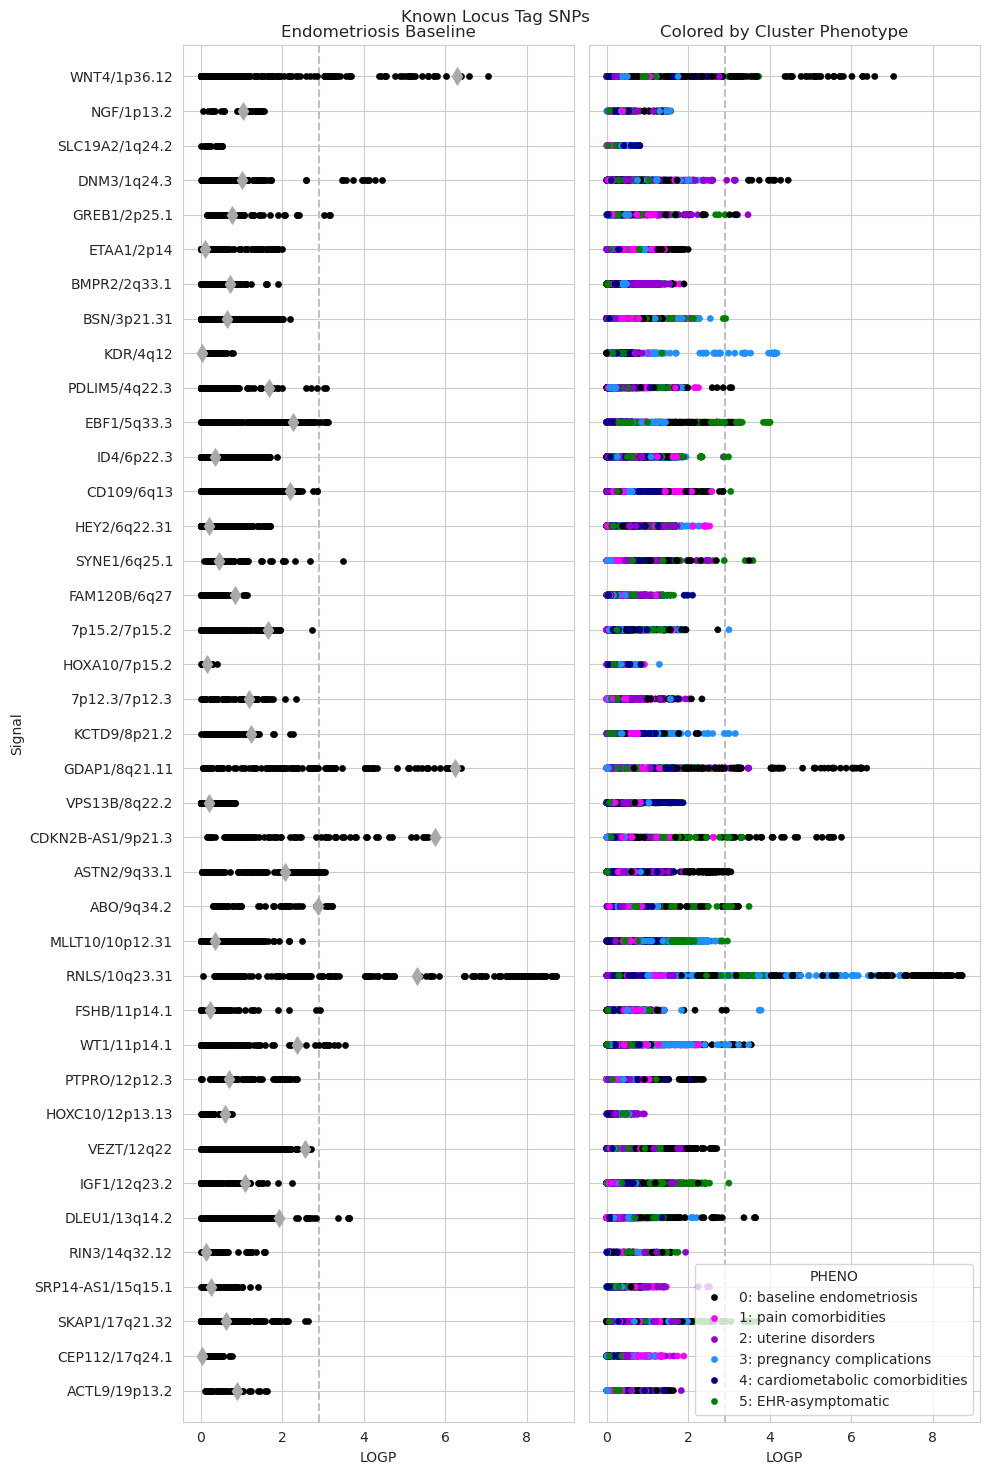

In [70]:
os.makedirs('Plots', exist_ok=True)

fig, axes = plt.subplots(ncols=2, sharey=True)

ax = axes[0]

fig.set_size_inches(10, 15)
plot_df = df.copy()
plot_df = plot_df[plot_df['PHENO'] == 'endometriosis']
if meta_group in ['EUR', 'AFR']:
    plot_df = plot_df[plot_df['I'] <= 75]

# All SNPs
sns.scatterplot(data=plot_df, y='Signal', x='LOGP', color='k', edgecolor=None, s=20, legend=False, ax=ax)

# Lead SNPs
plot_df2 = df.set_index(['CHR', 'BP'])
plot_df2 = plot_df2.loc[plot_df2.index.isin(rahmioglu.reset_index().set_index(['Chr', 'Position (b38)']).index)]
plot_df2 = plot_df2[plot_df2['PHENO'] == 'endometriosis']
sns.scatterplot(data=plot_df2, y='Signal', x='LOGP', color='darkgray', edgecolor=None, s=80, legend=False, marker='d', ax=ax)

ax.axvline(-np.log10(sig_line), c='silver', linestyle='dashed', zorder=-10)

top, bottom = ax.get_ylim()
plt.gca().set_ylim(top-0.5, bottom+0.5)

ax.set_title(f'Endometriosis Baseline')

os.makedirs('Plots', exist_ok=True)

ax = axes[1]
plot_df = df.copy()
if meta_group in ['EUR', 'AFR']:
    plot_df = plot_df[plot_df['I'] <= 75]

# All SNPs
plot_df['PHENO'] = plot_df['PHENO'].replace(pheno_map)
sns.scatterplot(data=plot_df, y='Signal', x='LOGP', hue='PHENO',
                palette=colors2, edgecolor=None, s=20, ax=ax)

ax.axvline(-np.log10(sig_line), c='silver', linestyle='dashed', zorder=-10)

top, bottom = plt.gca().get_ylim()
ax.set_ylim(top-0.5, bottom+0.5)

ax.set_title(f'Colored by Cluster Phenotype')
fig.suptitle('Known Locus Tag SNPs')
plt.tight_layout()
plt.savefig(f'Plots/{meta_group}_signal_manhattan_plot_{m_u}_two_panes.png', bbox_inches='tight')
plt.show()

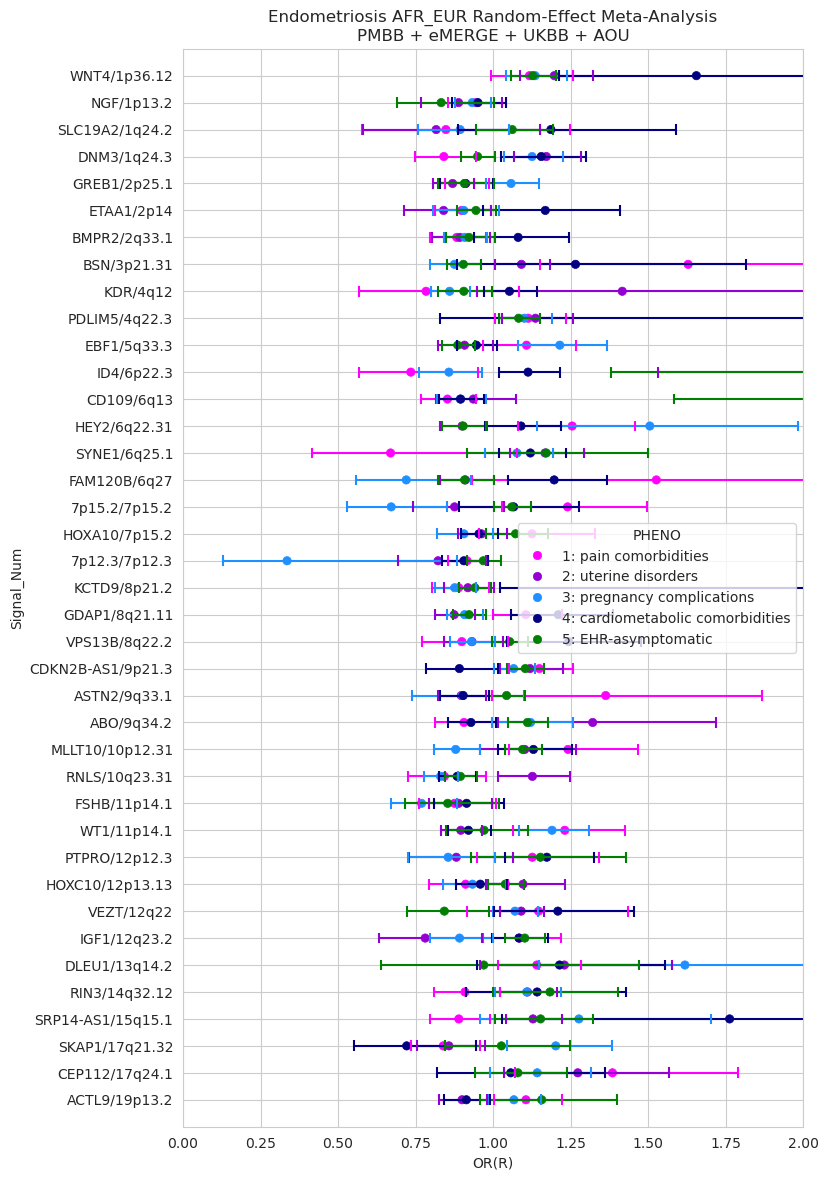

29416    G
29537    T
29700    A
29766    G
29432    C
Name: A1, dtype: object
28966    T
28979    G
29034    T
29053    G
28958    T
Name: A1, dtype: object
40690    C
40326    A
40704    T
40615    T
40700    A
Name: A1, dtype: object
59177    T
59106    G
58927    A
59192    A
58947    T
Name: A1, dtype: object
37723    G
40261    G
40032    C
40305    T
39604    G
Name: A1, dtype: object
6052    A
7709    C
6036    C
6079    C
6260    G
Name: A1, dtype: object
7834     T
9532     T
9827     G
9948     A
10297    A
Name: A1, dtype: object
18909    C
18940    C
18641    T
20699    C
18709    T
Name: A1, dtype: object
37478    C
37245    A
37510    C
37451    A
37248    A
Name: A1, dtype: object
58836    T
58591    C
58736    T
58207    T
58330    T
Name: A1, dtype: object
52318    C
52307    A
52774    T
52913    G
52848    G
Name: A1, dtype: object
3097    A
3397    G
3398    G
3249    T
2112    A
Name: A1, dtype: object
14335    A
14270    C
12984    G
13733    T
14231    T
Name: A

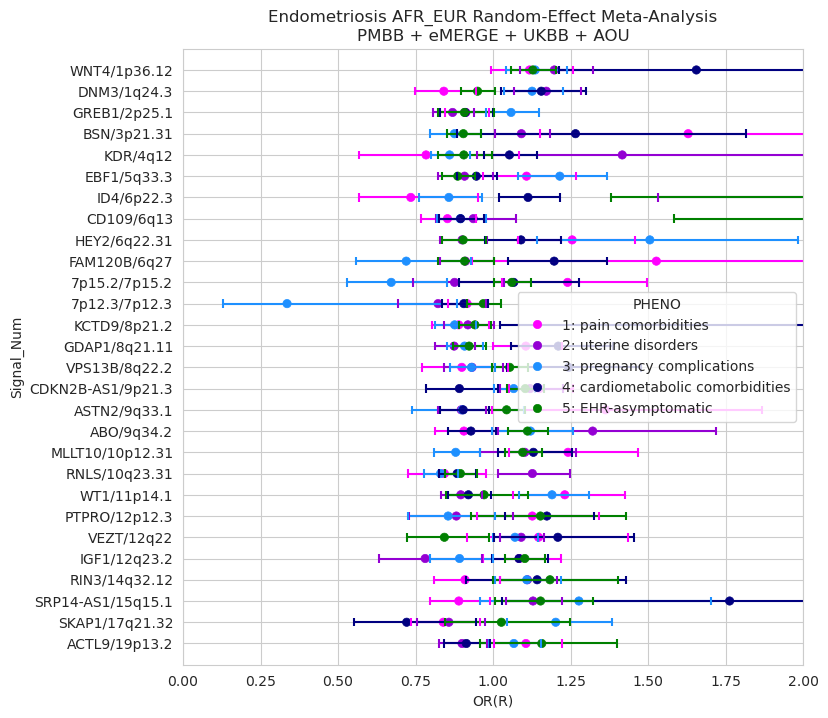

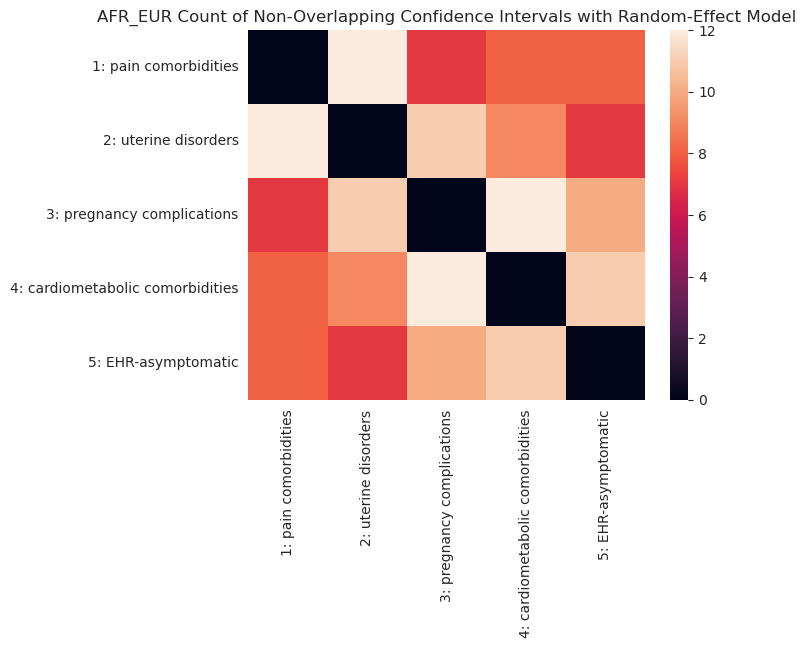

<Figure size 640x480 with 0 Axes>

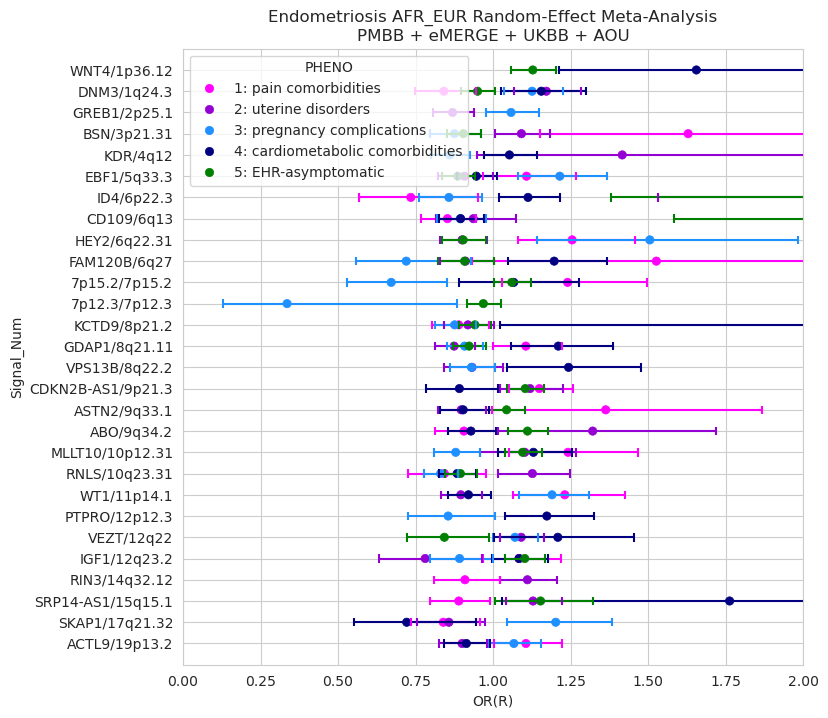

In [71]:
plot_df = df.copy()

if meta_group in ['EUR', 'AFR']:
    plot_df = plot_df[plot_df['I'] <= 75]

# snp_counts = plot_df['SNP'].value_counts().sort_values(ascending=False).to_frame()
# snp_counts['Signal'] = plot_df.drop_duplicates(subset=['Signal', 'SNP'])[['Signal', 'SNP']].set_index('SNP').loc[snp_counts.index]
# snp_counts = snp_counts.drop_duplicates(subset='Signal')
# keep_snps = snp_counts.index
# plot_df = plot_df[plot_df['SNP'].isin(keep_snps)]

# keep_snps = plot_df[plot_df['PHENO'] == 'endometriosis'].sort_values(by='P').drop_duplicates(subset=['Signal'], keep='first')['SNP'].unique()
# plot_df = plot_df[plot_df['SNP'].isin(keep_snps)]

plot_df = plot_df.sort_values(by='P').drop_duplicates(subset=['PHENO', 'Signal'], keep='first')

# plot_df = plot_df[plot_df.set_index(['CHR', 'BP']).index.isin(rahmioglu.reset_index().set_index(['Chr', 'Position (b38)']).index)]

plot_df['PHENO'] = plot_df['PHENO'].replace(pheno_map)
plot_df = plot_df[plot_df['PHENO'] != '0: baseline endometriosis']
plot_df = plot_df.sort_values(by=['CHR', 'BP'], ascending=False)

fig, ax = plt.subplots()
fig.set_size_inches(8, 14)

signal_num = dict(zip(plot_df['Signal'].unique(), np.arange(len(plot_df['Signal'].unique()))))
plot_df['Signal_Num'] = [signal_num[s] for s in plot_df['Signal']]

plot_df = plot_df.sort_values(by='PHENO')
pheno_i = dict(zip(plot_df['PHENO'].unique(), np.arange(6)))

tick_width = 0.2
use_cmap = new_cmap
ax.hlines(plot_df['Signal_Num'], plot_df['CI_OR_L'], plot_df['CI_OR_U'], colors=[use_cmap(pheno_i[p]) for p in plot_df['PHENO']])
ax.vlines(plot_df['CI_OR_L'], plot_df['Signal_Num'] - tick_width, plot_df['Signal_Num'] + tick_width, colors=[use_cmap(pheno_i[p]) for p in plot_df['PHENO']])
ax.vlines(plot_df['CI_OR_U'], plot_df['Signal_Num'] - tick_width, plot_df['Signal_Num'] + tick_width, colors=[use_cmap(pheno_i[p]) for p in plot_df['PHENO']])

use_colors = colors
sns.scatterplot(data=plot_df, y='Signal_Num', x=or_col, hue='PHENO',
                palette=use_colors, edgecolor=None, ax=ax)

rahm_or = rahmioglu.reset_index().set_index('Signal')['Overall_OR']
rahm_or = rahm_or[rahm_or.index.isin(signal_num)]
rahm_or = rahm_or.rename(index=signal_num)
# ax.vlines(rahm_or, rahm_or.index - 0.4, rahm_or.index + 0.4, color='silver', linewidth=3)

ax.set_yticks(list(signal_num.values()))
ax.set_yticklabels(list(signal_num.keys()))
ax.set_title(f'Endometriosis {meta_group} {model_used} Meta-Analysis\nPMBB + eMERGE + UKBB + AOU')
ax.set_ylim(-1, max(signal_num.values()) + 1)
ax.set_xlim(0, 2)

plt.savefig(f'Plots/{meta_group}_{m_u}_endo_manhattan_T.png', bbox_inches='tight')
plt.show()

keep_dfs = []
keep_dfs_disjoint_only = []

all_differences = pd.DataFrame(data=0, index=plot_df['PHENO'].unique(), columns=plot_df['PHENO'].unique())

for signal, subDF in plot_df.groupby('Signal'):
    M = len(subDF)
    print(subDF['A1'])

    lower_2D_1 = np.broadcast_to(subDF['CI_OR_L'], (M,M))
    lower_2D_2 = np.broadcast_to(subDF['CI_OR_L'], (M,M)).T
    upper_2D_1 = np.broadcast_to(subDF['CI_OR_U'], (M,M))
    upper_2D_2 = np.broadcast_to(subDF['CI_OR_U'], (M,M)).T

    overlap = ((lower_2D_1 <= upper_2D_2) & (upper_2D_1 >= upper_2D_2)) | \
              ((lower_2D_1 <= upper_2D_1) & (upper_2D_1 >= upper_2D_1))

    disjoint = ((lower_2D_1 > upper_2D_2) & (upper_2D_1 > upper_2D_2)) | \
               ((lower_2D_1 < lower_2D_2) & (upper_2D_1 < lower_2D_2))

    disjoint = pd.DataFrame(disjoint | disjoint.T, index=subDF['PHENO'], columns=subDF['PHENO'])
    disjoint = disjoint.reindex_like(all_differences)
    all_differences += disjoint.fillna(0).astype(int)

    if np.any(disjoint):
        keep_phenos = disjoint.index
        keep_dfs.append(subDF[subDF['PHENO'].isin(keep_phenos)])

        keep_phenos_disjoint_only = disjoint.index[disjoint.apply(lambda x: np.any(x), axis=1)]
        keep_dfs_disjoint_only.append(subDF[subDF['PHENO'].isin(keep_phenos_disjoint_only)])

plot_df = pd.concat(keep_dfs)
plot_df_disjoint_only = pd.concat(keep_dfs_disjoint_only)

fig, ax = plt.subplots()
fig.set_size_inches(8, 8)

plot_df = plot_df.sort_values(by=['CHR', 'BP'], ascending=False)
signal_num = dict(zip(plot_df['Signal'].unique(), np.arange(len(plot_df['Signal'].unique()))))
plot_df['Signal_Num'] = [signal_num[s] for s in plot_df['Signal']]

plot_df = plot_df.sort_values(by='PHENO')
pheno_i = dict(zip(plot_df['PHENO'].unique(), np.arange(6)))

colors3 = [colors2[i] for i in range(len(colors2)) if sorted(list(pheno_map.values()))[i] in plot_df['PHENO'].unique()]
new_cmap3 = mpl.colors.ListedColormap(colors3)

tick_width = 0.2
ax.hlines(plot_df['Signal_Num'], plot_df['CI_OR_L'], plot_df['CI_OR_U'], colors=[new_cmap3(pheno_i[p]) for p in plot_df['PHENO']])
ax.vlines(plot_df['CI_OR_L'], plot_df['Signal_Num'] - tick_width, plot_df['Signal_Num'] + tick_width, colors=[new_cmap3(pheno_i[p]) for p in plot_df['PHENO']])
ax.vlines(plot_df['CI_OR_U'], plot_df['Signal_Num'] - tick_width, plot_df['Signal_Num'] + tick_width, colors=[new_cmap3(pheno_i[p]) for p in plot_df['PHENO']])


sns.scatterplot(data=plot_df, y='Signal_Num', x=or_col, hue='PHENO',
                palette=colors3, edgecolor=None, ax=ax)

rahm_or = rahmioglu.reset_index().set_index('Signal')['Overall_OR']
rahm_or = rahm_or[rahm_or.index.isin(signal_num)]
rahm_or = rahm_or.rename(index=signal_num)
# ax.vlines(rahm_or, rahm_or.index - 0.4, rahm_or.index + 0.4, color='silver', linewidth=3)

ax.set_yticks(list(signal_num.values()))
ax.set_yticklabels(list(signal_num.keys()))
ax.set_title(f'Endometriosis {meta_group} {model_used} Meta-Analysis\nPMBB + eMERGE + UKBB + AOU')
ax.set_ylim(-1, max(signal_num.values()) + 1)
ax.set_xlim(0, 2)

# plt.axvline(1, c='k', zorder=-10, linewidth=3)

plt.savefig(f'Plots/{meta_group}_{m_u}_disjoint_endo_manhattan_T.png', bbox_inches='tight')
plt.show()
plt.clf()

sns.heatmap(all_differences.sort_index().sort_index(axis=1))
plt.title(f'{meta_group} Count of Non-Overlapping Confidence Intervals with {model_used} Model')
plt.savefig(f'Plots/{meta_group}_{m_u}_pheno_diff_heatmap.png', bbox_inches='tight')
plt.show()
plt.clf()

fig, ax = plt.subplots()
fig.set_size_inches(8, 8)

plot_df = plot_df_disjoint_only.sort_values(by=['CHR', 'BP'], ascending=False)
signal_num = dict(zip(plot_df['Signal'].unique(), np.arange(len(plot_df['Signal'].unique()))))
plot_df['Signal_Num'] = [signal_num[s] for s in plot_df['Signal']]

plot_df = plot_df.sort_values(by='PHENO')
pheno_i = dict(zip(plot_df['PHENO'].unique(), np.arange(6)))

colors3 = [colors2[i] for i in range(len(colors2)) if sorted(list(pheno_map.values()))[i] in plot_df['PHENO'].unique()]
new_cmap3 = mpl.colors.ListedColormap(colors3)

tick_width = 0.2
ax.hlines(plot_df['Signal_Num'], plot_df['CI_OR_L'], plot_df['CI_OR_U'], colors=[new_cmap3(pheno_i[p]) for p in plot_df['PHENO']])
ax.vlines(plot_df['CI_OR_L'], plot_df['Signal_Num'] - tick_width, plot_df['Signal_Num'] + tick_width, colors=[new_cmap3(pheno_i[p]) for p in plot_df['PHENO']])
ax.vlines(plot_df['CI_OR_U'], plot_df['Signal_Num'] - tick_width, plot_df['Signal_Num'] + tick_width, colors=[new_cmap3(pheno_i[p]) for p in plot_df['PHENO']])


sns.scatterplot(data=plot_df, y='Signal_Num', x=or_col, hue='PHENO',
                palette=colors3, edgecolor=None, ax=ax)

rahm_or = rahmioglu.reset_index().set_index('Signal')['Overall_OR']
rahm_or = rahm_or[rahm_or.index.isin(signal_num)]
rahm_or = rahm_or.rename(index=signal_num)
# ax.vlines(rahm_or, rahm_or.index - 0.4, rahm_or.index + 0.4, color='silver', linewidth=3)

ax.set_yticks(list(signal_num.values()))
ax.set_yticklabels(list(signal_num.keys()))
ax.set_title(f'Endometriosis {meta_group} {model_used} Meta-Analysis\nPMBB + eMERGE + UKBB + AOU')
ax.set_ylim(-1, max(signal_num.values()) + 1)
ax.set_xlim(0, 2)

# plt.axvline(1, c='k', zorder=-10, linewidth=3)

plt.savefig(f'Plots/{meta_group}_{m_u}_disjoint_endo_manhattan_T_disjoint_only.png', bbox_inches='tight')
plt.show()

PHENO       0: baseline endometriosis  1: pain comorbidities  \
Signal_Num                                                     
0                            1.633017               1.333763   
1                            0.532096               1.889410   
2                            1.530178               2.001784   
3                            0.857924               1.462433   
4                            1.586365               0.939680   
5                            3.649171               1.565751   
6                            0.247567               0.773400   
7                            2.698970               0.635449   
8                            0.764472               0.713095   
9                            2.370794               0.746904   
10                           3.545308               2.258376   
11                           0.697886               1.183560   
12                           8.719877               1.620694   
13                           2.497163   

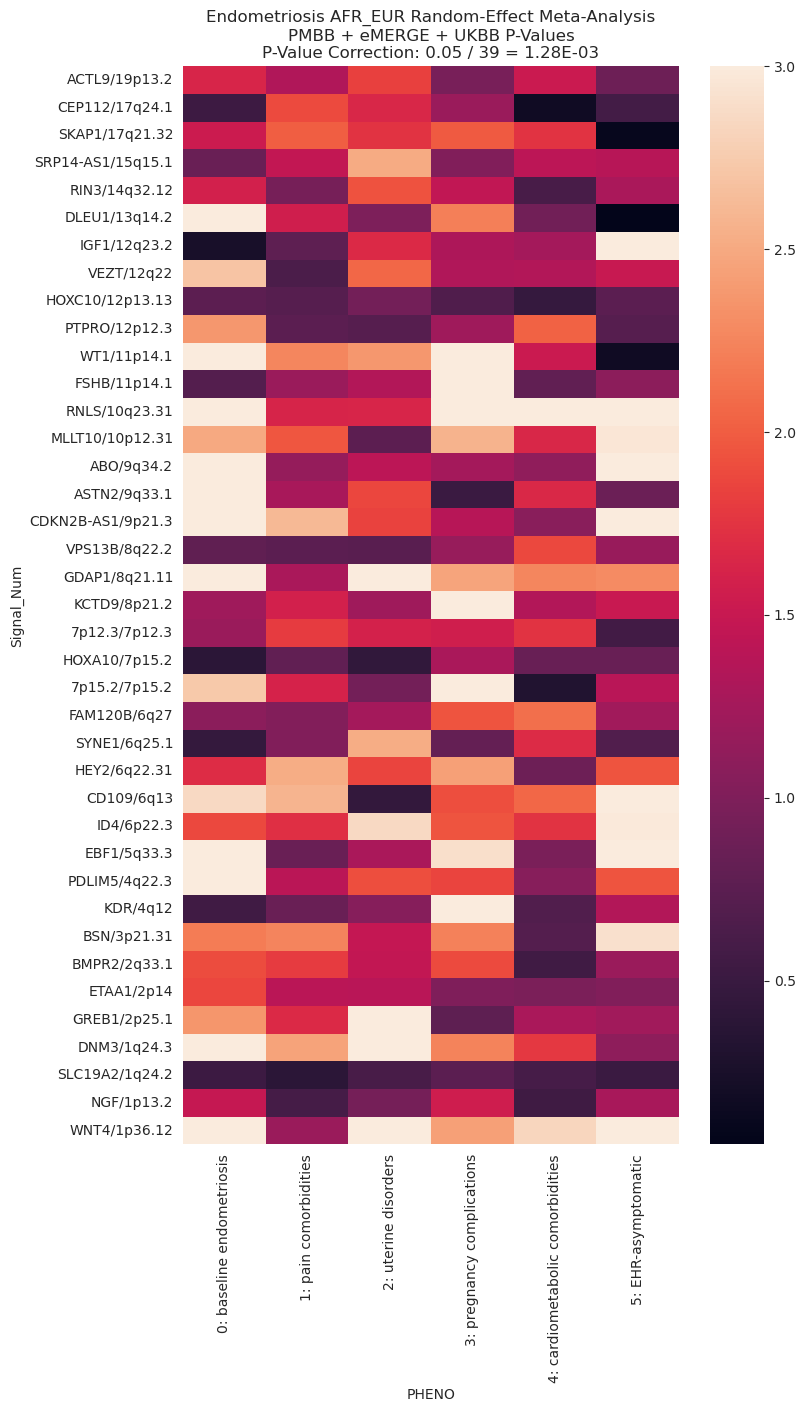

In [72]:
plot_df = df.copy()

p_thresh = 0.05 / len(rahmioglu)
# p_thresh = 0.05

if meta_group in ['EUR', 'AFR']:
    plot_df = plot_df[plot_df['I'] <= 75]

# snp_counts = plot_df['SNP'].value_counts().sort_values(ascending=False).to_frame()
# snp_counts['Signal'] = plot_df.drop_duplicates(subset=['Signal', 'SNP'])[['Signal', 'SNP']].set_index('SNP').loc[snp_counts.index]
# snp_counts = snp_counts.drop_duplicates(subset='Signal')
# keep_snps = snp_counts.index
# plot_df = plot_df[plot_df['SNP'].isin(keep_snps)]

plot_df = plot_df.sort_values(by='P').drop_duplicates(subset=['Signal', 'PHENO'], keep='first')
plot_df['PHENO'] = plot_df['PHENO'].replace(pheno_map)

# keep_snps = plot_df[plot_df['PHENO'] == 'endometriosis'].sort_values(by='P').drop_duplicates(subset=['Signal'], keep='first')['SNP'].unique()
# plot_df = plot_df[plot_df['SNP'].isin(keep_snps)]
# plot_df = plot_df.sort_values(by='P').drop_duplicates(subset=['PHENO', 'Signal'], keep='first')

plot_df['PHENO'] = plot_df['PHENO'].replace(pheno_map)
# plot_df = plot_df[plot_df['PHENO'] != '0: baseline endometriosis']
plot_df = plot_df.sort_values(by=['CHR', 'BP'], ascending=False)

fig, ax = plt.subplots()
fig.set_size_inches(8, 14)

signal_num = dict(zip(plot_df['Signal'].unique(), np.arange(len(plot_df['Signal'].unique()))))
plot_df['Signal_Num'] = [signal_num[s] for s in plot_df['Signal']]

plot_df = plot_df.sort_values(by='PHENO')
pheno_i = dict(zip(plot_df['PHENO'].unique(), np.arange(6)))

tick_width = 0.2
use_cmap = new_cmap

use_colors = colors

plot_df = plot_df.pivot(index='Signal_Num', columns='PHENO', values='LOGP')
print(plot_df)


sns.heatmap(plot_df, vmax=3)

ax.set_yticks([v + 0.5 for v in list(signal_num.values())])
ax.set_yticklabels(list(signal_num.keys()), rotation=0)
p_thresh = 0.05 / len(rahmioglu)
ax.set_title(f'Endometriosis {meta_group} {model_used} Meta-Analysis\nPMBB + eMERGE + UKBB P-Values\nP-Value Correction: 0.05 / {len(rahmioglu)} = {p_thresh:.2E}')


print((plot_df > -np.log10(p_thresh)).apply(lambda x: x.value_counts(), result_type='expand').transpose())

plt.savefig(f'Plots/{meta_group}_{m_u}_endo_logp_heatmap.png', bbox_inches='tight')
plt.show()

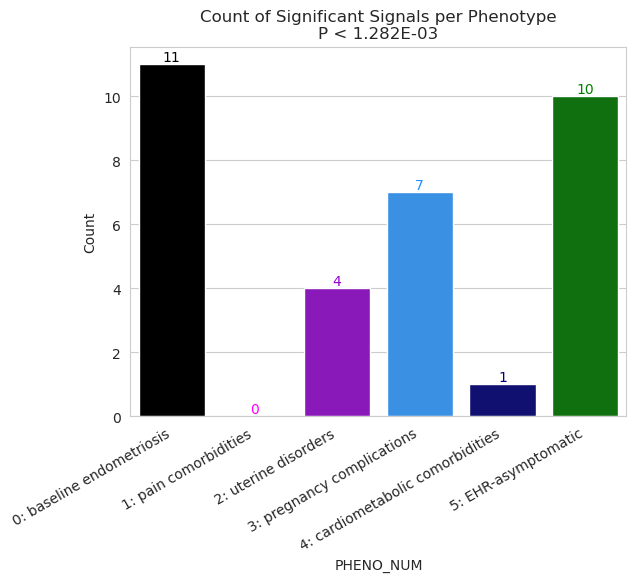

In [73]:
plot_df = df.copy()

p_thresh = sig_line
# p_thresh = 0.05

if meta_group in ['EUR', 'AFR']:
    plot_df = plot_df[plot_df['I'] <= 75]


# snp_counts = plot_df['SNP'].value_counts().sort_values(ascending=False).to_frame()
# snp_counts['Signal'] = plot_df.drop_duplicates(subset=['Signal', 'SNP'])[['Signal', 'SNP']].set_index('SNP').loc[snp_counts.index]
# snp_counts = snp_counts.drop_duplicates(subset='Signal')
# keep_snps = snp_counts.index
# plot_df = plot_df[plot_df['SNP'].isin(keep_snps)]

plot_df = plot_df.sort_values(by='P').drop_duplicates(subset=['Signal', 'PHENO'], keep='first')
plot_df['PHENO'] = plot_df['PHENO'].replace(pheno_map)

pheno_num = dict(zip(sorted(pheno_map.values()), np.arange(len(pheno_map.keys()))))
plot_df['PHENO_NUM'] = plot_df['PHENO'].replace(pheno_num)

colors4 = [c if c != 'k' else 'w' for c in colors2]

fig, ax = plt.subplots()

sig_counts = pd.DataFrame(columns=['0.05', 'BF-Corrected'])
for pheno, subDF in plot_df.groupby('PHENO'):
    count1 = (subDF[p_col] < p_thresh).astype(int).sum()
    sig_counts.loc[pheno_num[pheno], 'BF-Corrected'] = count1
    count2 = (subDF[p_col] < 0.05).sum()
    sig_counts.loc[pheno_num[pheno], '0.05'] = count2
    ax.text(pheno_num[pheno], count1, f'{count1}',
            color=colors2[pheno_num[pheno]], ha='center', va='bottom')

sig_counts.index.name = 'PHENO_NUM'
sig_counts = sig_counts.reset_index()

"""
sns.barplot(data=sig_counts, x='PHENO_NUM', y='0.05',
            hue='PHENO_NUM', dodge=False,
            palette=colors2, alpha=0.3,
            ax=ax, legend=False)
"""

sns.barplot(data=sig_counts, x='PHENO_NUM', y='BF-Corrected',
            hue='PHENO_NUM', dodge=False,
            palette=colors2, alpha=1,
            ax=ax, legend=False)

# ax.set_ylim(0, 35)
# ax.set_yticks(np.arange(0, 36, 2))
ax.set_title(f'Count of Significant Signals per Phenotype\nP < {p_thresh:.3E}')
ax.set_ylabel('Count')

ax.set_xticks(np.arange(len(pheno_num)))
ax.set_xticklabels(pheno_num.keys(), rotation=30, ha='right')

plt.savefig(f'Plots/{meta_group}_{m_u}_sig_signal_counts.png', bbox_inches='tight')
plt.show()

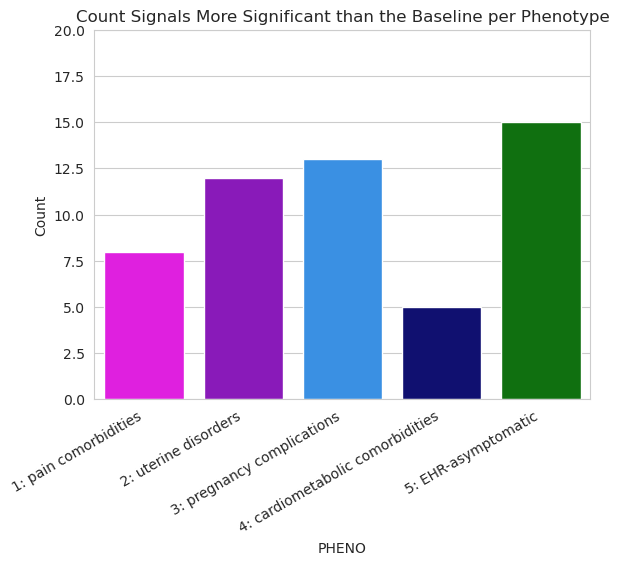

In [74]:
plot_df = df.copy()

p_thresh = sig_line
# p_thresh = 0.05

if meta_group in ['EUR', 'AFR']:
    plot_df = plot_df[plot_df['I'] <= 75]


# snp_counts = plot_df['SNP'].value_counts().sort_values(ascending=False).to_frame()
# snp_counts['Signal'] = plot_df.drop_duplicates(subset=['Signal', 'SNP'])[['Signal', 'SNP']].set_index('SNP').loc[snp_counts.index]
# snp_counts = snp_counts.drop_duplicates(subset='Signal')
# keep_snps = snp_counts.index
# plot_df = plot_df[plot_df['SNP'].isin(keep_snps)]

plot_df = plot_df.sort_values(by=p_col).drop_duplicates(subset=['Signal', 'PHENO'], keep='first')
plot_df['PHENO'] = plot_df['PHENO'].replace(pheno_map)

pheno_num = dict(zip(sorted(pheno_map.values()), np.arange(len(pheno_map.keys()))))
plot_df['PHENO_NUM'] = plot_df['PHENO'].replace(pheno_num)
plot_df = plot_df.pivot_table(columns='PHENO', index='Signal', values=p_col)
plot_df = plot_df.apply(lambda x: x < plot_df['0: baseline endometriosis'])

colors4 = [c if c != 'k' else 'w' for c in colors2]

fig, ax = plt.subplots()

sig_counts = pd.DataFrame(index=plot_df.columns, columns=['Beats_Pos_Control'])

sig_counts.index.name = 'PHENO'
sig_counts['Beats_Pos_Control'] = plot_df.sum()
sig_counts = sig_counts.drop('0: baseline endometriosis')
sig_counts = sig_counts.reset_index()

"""
sns.barplot(data=sig_counts, x='PHENO_NUM', y='0.05',
            hue='PHENO_NUM', dodge=False,
            palette=colors2, alpha=0.3,
            ax=ax, legend=False)
"""

sns.barplot(data=sig_counts, x='PHENO', y='Beats_Pos_Control',
            hue='PHENO', dodge=False,
            palette=colors, alpha=1,
            ax=ax, legend=False)

# ax.set_ylim(0, 35)
# ax.set_yticks(np.arange(0, 36, 2))
ax.set_title(f'Count Signals More Significant than the Baseline per Phenotype')
ax.set_ylabel('Count')

ax.set_xticks(np.arange(len(pheno_num)-1))
ax.set_ylim(0, 20)
ax.set_xticklabels([k for k in pheno_num.keys() if '0' not in k], rotation=30, ha='right')

plt.savefig(f'Plots/{meta_group}_{m_u}_beat_positive_control_counts.png', bbox_inches='tight')
plt.show()

                  Signal          P(R)
43521      RNLS/10q23.31  1.906000e-09
1078        WNT4/1p36.12  9.125000e-08
31849      GDAP1/8q21.11  4.187000e-07
37327  CDKN2B-AS1/9p21.3  1.746000e-06
3269         DNM3/1q24.3  3.536000e-05
53461      DLEU1/13q14.2  2.243000e-04
45124        WT1/11p14.1  2.849000e-04
40677         ABO/9q34.2  5.867000e-04
14388        EBF1/5q33.3  7.643000e-04
12412      PDLIM5/4q22.3  8.583000e-04
39485       ASTN2/9q33.1  9.010000e-04
18944         CD109/6q13  1.398000e-03
29031      7p15.2/7p15.2  1.884000e-03
49149         VEZT/12q22  2.000000e-03
42189    MLLT10/10p12.31  3.183000e-03
47043      PTPRO/12p12.3  4.258000e-03
3940        GREB1/2p25.1  4.385000e-03
8804         BSN/3p21.31  6.439000e-03
6117        BMPR2/2q33.1  1.273000e-02
16166         ID4/6p22.3  1.327000e-02
4162          ETAA1/2p14  1.362000e-02
23531       HEY2/6q22.31  2.023000e-02
59170      ACTL9/19p13.2  2.328000e-02
54072      RIN3/14q32.12  2.592000e-02
57218     SKAP1/17q21.32 

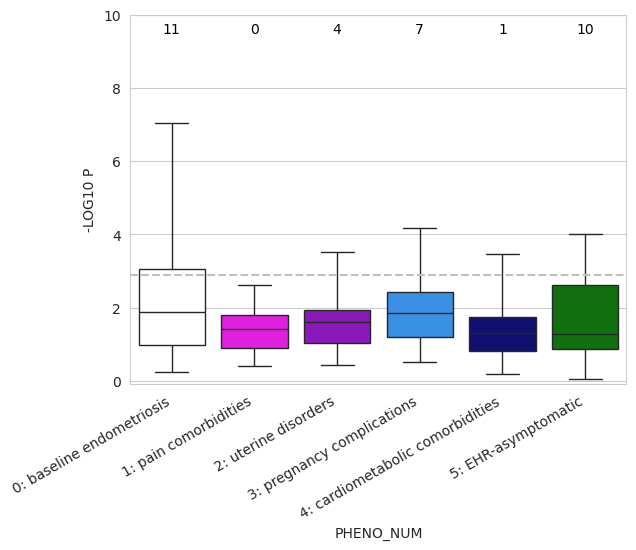

In [75]:
plot_df = df.copy()

p_thresh = sig_line
# p_thresh = 0.05

if meta_group in ['EUR', 'AFR']:
    plot_df = plot_df[plot_df['I'] <= 75]

# snp_counts = plot_df['SNP'].value_counts().sort_values(ascending=False).to_frame()
# snp_counts['Signal'] = plot_df.drop_duplicates(subset=['Signal', 'SNP'])[['Signal', 'SNP']].set_index('SNP').loc[snp_counts.index]
# snp_counts = snp_counts.drop_duplicates(subset='Signal')
# keep_snps = snp_counts.index
# plot_df = plot_df[plot_df['SNP'].isin(keep_snps)]

plot_df = plot_df.sort_values(by='P').drop_duplicates(subset=['Signal', 'PHENO'], keep='first')
plot_df['PHENO'] = plot_df['PHENO'].replace(pheno_map)

pheno_num = dict(zip(sorted(pheno_map.values()), np.arange(len(pheno_map.keys()))))
plot_df['PHENO_NUM'] = plot_df['PHENO'].replace(pheno_num)

colors4 = [c if c != 'k' else 'w' for c in colors2]

fig, ax = plt.subplots()

bp = sns.boxplot(data=plot_df, x='PHENO_NUM', y='LOGP', hue='PHENO',
                 palette=colors4, dodge=False,
                 legend=False, ax=ax, showfliers=False,
                 whis=2)

ax.axhline(-np.log10(p_thresh), color='silver', linestyle='dashed')
# ax.axhline(-np.log10(0.05), color='springgreen', linestyle='dashed')
ax.set_xticks(np.arange(len(pheno_num)))
ax.set_xticklabels(pheno_num.keys(), rotation=30, ha='right')

ax.set_ylabel('-LOG10 P')

ax.set_ylim(-0.1, 10)

for pheno, subDF in plot_df.groupby('PHENO'):
    print(subDF[['Signal', p_col]].sort_values(by=p_col))
    count1 = (subDF[p_col] < p_thresh).sum()
    count2 = (subDF[p_col] < 0.05).sum()
    ax.text(pheno_num[pheno], 9.5, f'{count1}', color='k', ha='center')
    # ax.text(pheno_num[pheno], 4.6, f'{count2}', color='springgreen', ha='center')

plt.savefig(f'Plots/{meta_group}_{m_u}_log_p_box_plot.png', bbox_inches='tight')
plt.show()

(-4.0, 40.0)


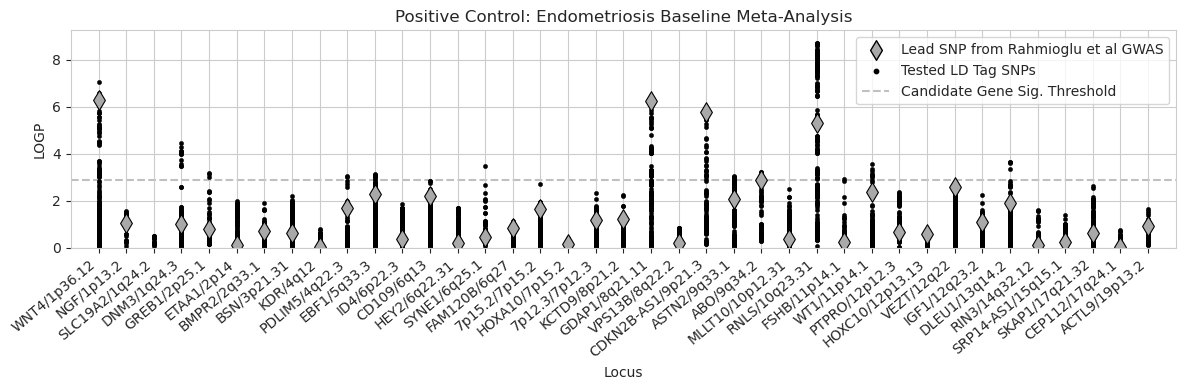

'WNT4/1p36.12 (P = 9.12E-08, rs2235529:T), DNM3/1q24.3 (P = 3.54E-05, rs655853:C), GREB1/2p25.1 (P = 6.55E-04, rs34532804:A), PDLIM5/4q22.3 (P = 8.58E-04, rs1493112:T), EBF1/5q33.3 (P = 7.64E-04, rs1878936:C), SYNE1/6q25.1 (P = 3.20E-04, rs13206045:C), GDAP1/8q21.11 (P = 4.19E-07, rs10957712:T), CDKN2B-AS1/9p21.3 (P = 1.75E-06, rs10122243:T), ASTN2/9q33.1 (P = 9.01E-04, rs62576127:A), ABO/9q34.2 (P = 5.87E-04, rs495828:G), RNLS/10q23.31 (P = 1.91E-09, rs792212:T), FSHB/11p14.1 (P = 1.17E-03, rs11031006:A), WT1/11p14.1 (P = 2.85E-04, rs72638188:T), DLEU1/13q14.2 (P = 2.24E-04, rs9568417:G)'

In [79]:
fig, ax = plt.subplots()

fig.set_size_inches(12, 4)
plot_df = df.copy()
plot_df = plot_df[plot_df['PHENO'] == 'endometriosis']
if meta_group in ['EUR', 'AFR']:
    plot_df = plot_df[plot_df['I'] <= 75]

# All SNPs
sns.scatterplot(data=plot_df, x='Signal', y='LOGP', color='k', edgecolor=None, s=10, legend=False, ax=ax)

# Lead SNPs
plot_df2 = df.set_index(['CHR', 'BP'])
plot_df2 = plot_df2.loc[plot_df2.index.isin(rahmioglu.reset_index().set_index(['Chr', 'Position (b38)']).index)]
plot_df2 = plot_df2[plot_df2['PHENO'] == 'endometriosis']
sns.scatterplot(data=plot_df2, x='Signal', y='LOGP', color='darkgray', edgecolor='k', s=100, legend=False, marker='d', ax=ax)

ax.axhline(-np.log10(sig_line), c='silver', linestyle='dashed', zorder=-10)

ax.scatter(-2, -2, color='darkgray', edgecolor='k', s=100, marker='d', label='Lead SNP from Rahmioglu et al GWAS')
ax.scatter(-2, -2, color='k', s=10, label='Tested LD Tag SNPs')
ax.axhline(-2, color='silver', linestyle='dashed', label='Candidate Gene Sig. Threshold')
ax.legend()

ax.set_title(f'Positive Control: Endometriosis Baseline Meta-Analysis')
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_ylim(bottom=0)
print(ax.get_xlim())
ax.set_xlim(-1, 39)

ax.tick_params(axis='both', which='major', left=True, bottom=True)
ax.set_xlabel('Locus')

plt.tight_layout()
plt.savefig(f'../Manuscript_Plots/figure_5_{meta_group}_positive_control_manhattan_plot.png', bbox_inches='tight')
plt.show()

', '.join(plot_df[plot_df[p_col] < sig_line].sort_values(by=p_col).drop_duplicates('Signal').sort_values(by=['CHR', 'POS']).apply(lambda x: f'{x["Signal"]} (P = {x[p_col]:.2E}, {x["RSID"]}:{x["A1"]})', axis=1))

(-4.0, 40.0)
(-1.9000000000000001, 39.9)


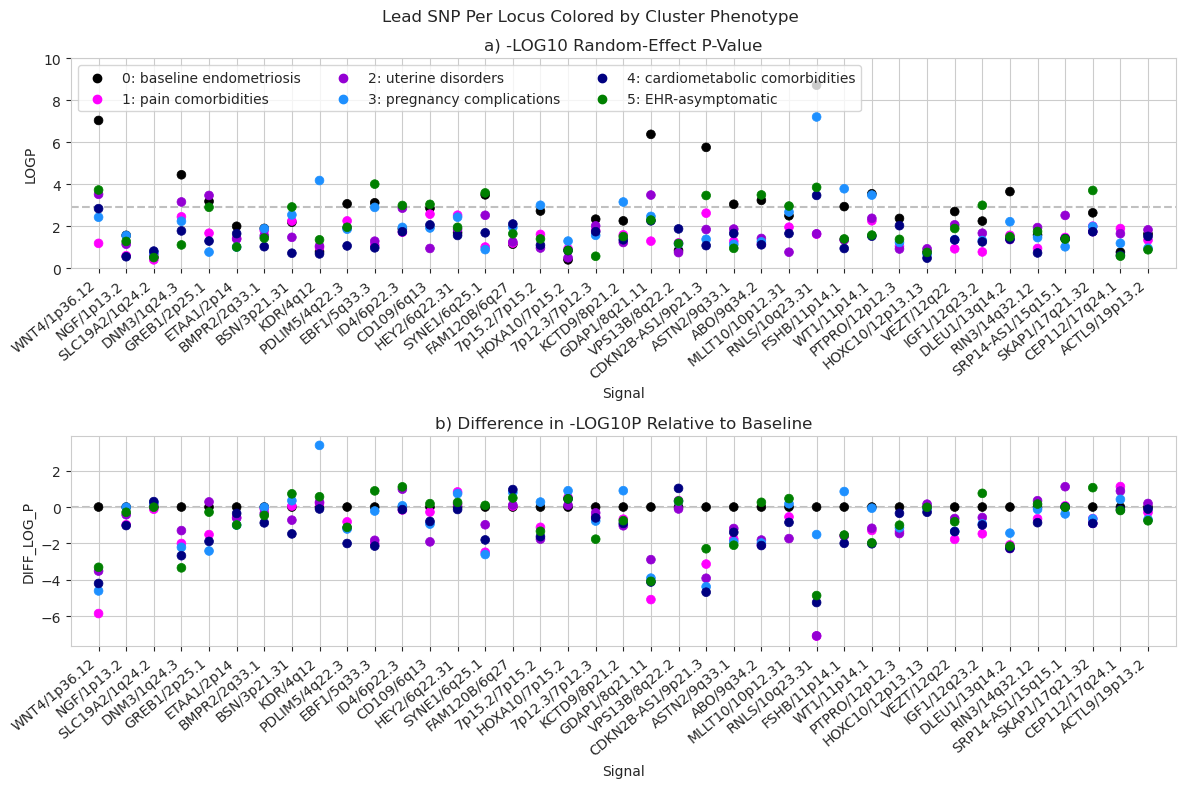

In [77]:
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(12, 8)
ax = axes[0]


plot_df = df.copy()
if meta_group in ['EUR', 'AFR']:
    plot_df = plot_df[plot_df['I'] <= 75]

# All SNPs
plot_df['PHENO'] = plot_df['PHENO'].replace(pheno_map)
plot_df = plot_df.sort_values(by=p_col).drop_duplicates(subset=['PHENO', 'Signal'])
plot_df = plot_df.sort_values(by=['PHENO', 'CHR', 'BP'])
sns.scatterplot(data=plot_df, x='Signal', y='LOGP', hue='PHENO',
                palette=colors2, edgecolor=None, s=40, ax=ax, legend=False)

for i, pheno in enumerate(plot_df['PHENO'].unique()):
    ax.scatter(-2, -2, label=pheno, color=colors2[i])

ax.legend(ncols=3, loc='upper left')

ax.axhline(-np.log10(sig_line), c='silver', linestyle='dashed', zorder=-10)

ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_ylim(bottom=0, top=10)
print(ax.get_xlim())
ax.set_xlim(-1, 39)

ax.tick_params(axis='both', which='major', left=True, bottom=True)

ax.set_title(f'a) -LOG10 Random-Effect P-Value')

ax = axes[1]
plot_df = df.copy()
if meta_group in ['EUR', 'AFR']:
    plot_df = plot_df[plot_df['I'] <= 75]

# All SNPs
plot_df['PHENO'] = plot_df['PHENO'].replace(pheno_map)
plot_df = plot_df.sort_values(by=p_col).drop_duplicates(subset=['PHENO', 'Signal'])

subtrahend = plot_df[plot_df['PHENO'] == '0: baseline endometriosis'].set_index('Signal').loc[plot_df['Signal'], 'LOGP'].values
plot_df['DIFF_LOG_P'] = plot_df['LOGP'] - subtrahend

plot_df = plot_df.sort_values(by=['PHENO', 'CHR', 'BP'])
sns.scatterplot(data=plot_df, x='Signal', y='DIFF_LOG_P', hue='PHENO',
                palette=colors2, edgecolor=None, s=40, ax=ax, legend=False)

ax.axhline(0, c='silver', linestyle='dashed', zorder=-10)

ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
# ax.set_ylim(0, 7)
print(ax.get_xlim())
ax.set_xlim(-1, 39)


for i, pheno in enumerate(plot_df['PHENO'].unique()):
    ax.scatter(-2, -2, label=pheno, color=colors2[i])

# ax.legend(ncols=3)

ax.tick_params(axis='both', which='major', left=True, bottom=True)

ax.set_title(f'b) Difference in -LOG10P Relative to Baseline')
plt.suptitle(f'Lead SNP Per Locus Colored by Cluster Phenotype')


plt.tight_layout()
plt.savefig(f'../Manuscript_Plots/figure_6_{meta_group}_cluster_p_value_plot.png', bbox_inches='tight')
plt.show()

PHENO            0: baseline endometriosis  1: pain comorbidities  \
GREB1/2p25.1                         False                  False   
EBF1/5q33.3                          False                  False   
CD109/6q13                           False                  False   
SYNE1/6q25.1                         False                  False   
7p15.2/7p15.2                        False                  False   
KCTD9/8p21.2                         False                  False   
ABO/9q34.2                           False                  False   
FSHB/11p14.1                         False                  False   
HOXC10/12p13.13                      False                  False   
IGF1/12q23.2                         False                  False   
SKAP1/17q21.32                       False                  False   
ACTL9/19p13.2                        False                  False   

PHENO            2: uterine disorders  3: pregnancy complications  \
GREB1/2p25.1                     

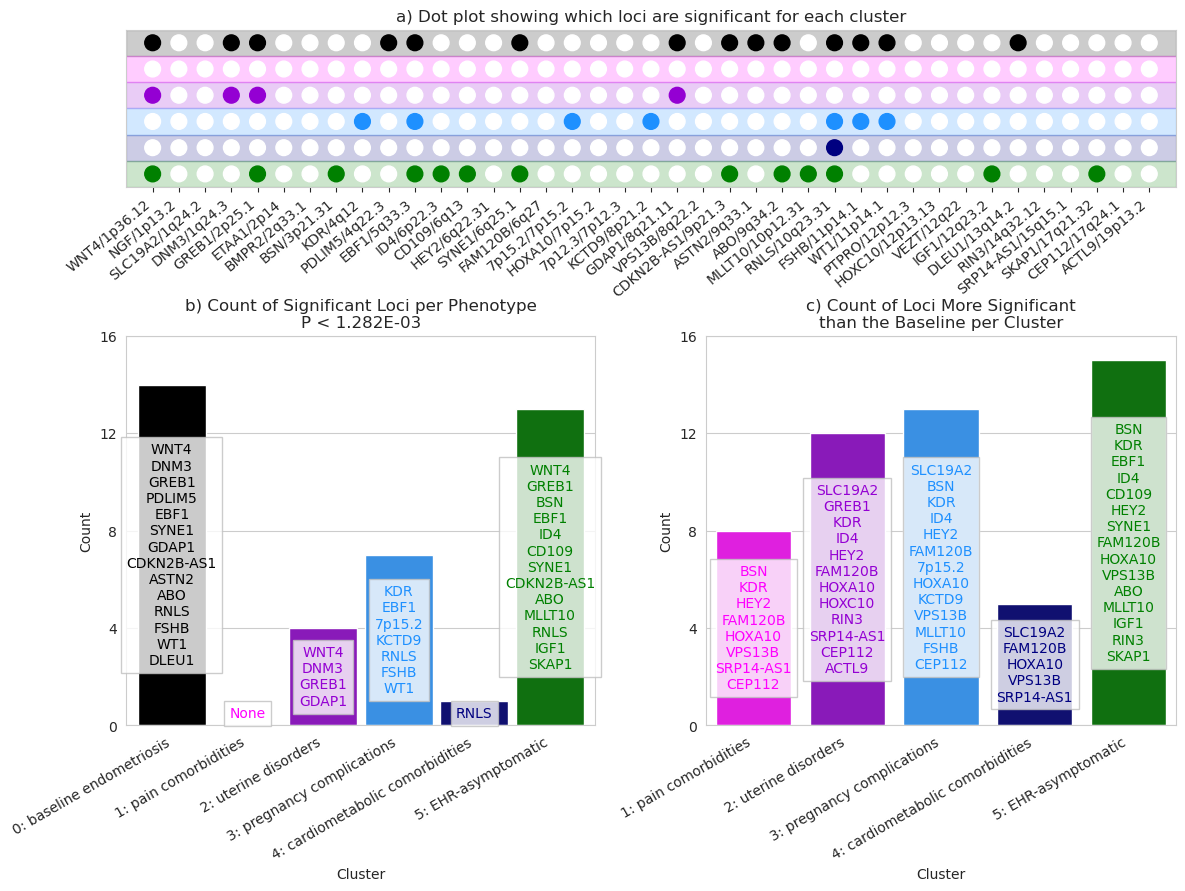

In [87]:
plot_df = df.copy()

p_thresh = sig_line
# p_thresh = 0.05

if meta_group in ['EUR', 'AFR']:
    plot_df = plot_df[plot_df['I'] <= 75]

signal_order = pd.Series(signal_num).sort_values(ascending=False).index

# snp_counts = plot_df['SNP'].value_counts().sort_values(ascending=False).to_frame()
# snp_counts['Signal'] = plot_df.drop_duplicates(subset=['Signal', 'SNP'])[['Signal', 'SNP']].set_index('SNP').loc[snp_counts.index]
# snp_counts = snp_counts.drop_duplicates(subset='Signal')
# keep_snps = snp_counts.index
# plot_df = plot_df[plot_df['SNP'].isin(keep_snps)]

plot_df = plot_df.sort_values(by=p_col).drop_duplicates(subset=['Signal', 'PHENO'], keep='first')
plot_df['PHENO'] = plot_df['PHENO'].replace(pheno_map)

pheno_num = dict(zip(sorted(pheno_map.values()), np.arange(len(pheno_map.keys()))))
plot_df['PHENO_NUM'] = plot_df['PHENO'].replace(pheno_num)
plot_df = plot_df.pivot_table(columns='PHENO', index='Signal', values=p_col).loc[signal_order]
p_val_pivot = plot_df.copy()
plot_df = plot_df.apply(lambda x: x < plot_df['0: baseline endometriosis'])

print(plot_df[plot_df.sum(axis=1) == 1])

colors4 = [c if c != 'k' else 'w' for c in colors2]

fig, axes = plt.subplots(ncols=2, gridspec_kw={'width_ratios': [1, 1], 'height_ratios': [0.5, 1]}, nrows=2)
fig.set_size_inches(12, 9)

ax = axes[1][1]

sig_counts = pd.DataFrame(index=plot_df.columns, columns=['Beats_Pos_Control'])

sig_counts.index.name = 'PHENO'
sig_counts['Beats_Pos_Control'] = plot_df.sum()
sig_counts = sig_counts.drop('0: baseline endometriosis')
sig_counts = sig_counts.reset_index()
sig_counts['PHENO_NUM'] = sig_counts['PHENO'].replace(pheno_num)

"""
sns.barplot(data=sig_counts, x='PHENO_NUM', y='0.05',
            hue='PHENO_NUM', dodge=False,
            palette=colors2, alpha=0.3,
            ax=ax, legend=False)
"""

for _, row in sig_counts.iterrows():
    pheno = row['PHENO']
    count1 = row['Beats_Pos_Control']

    sig_signals = plot_df.index[plot_df[pheno]]
    sig_signals = [s.split('/')[0] for s in sig_signals]
    # t = ax.text(pheno_num[pheno], count1+0.3, '\n'.join(sig_signals) if len(sig_signals) > 0 else 'None', color=colors2[pheno_num[pheno]], ha='center', va='bottom')
    # t.set_bbox(dict(facecolor='w', alpha=0.6, edgecolor='silver'))
    t = ax.text(pheno_num[pheno] - 1, max(0.5, count1 / 2), '\n'.join(sig_signals) if len(sig_signals) > 0 else 'None', color=colors2[pheno_num[pheno]], ha='center', va='center')
    t.set_bbox(dict(facecolor='w', alpha=0.8, edgecolor='silver'))

sns.barplot(data=sig_counts, x='PHENO_NUM', y='Beats_Pos_Control',
            hue='PHENO', dodge=False,
            palette=colors, alpha=1,
            ax=ax, legend=False)

# ax.set_ylim(0, 35)
# ax.set_yticks(np.arange(0, 36, 2))
ax.set_title(f'c) Count of Loci More Significant\nthan the Baseline per Cluster')
ax.set_ylabel('Count')

ax.set_xticks(np.arange(len(pheno_num)-1))
ax.set_ylim(0, 16)
ax.set_xticklabels([k for k in pheno_num.keys() if '0' not in k], rotation=30, ha='right')
ax.set_yticks(np.arange(0, 17, 4))
ax.set_xlabel('Cluster')


plot_df = df.copy()

p_thresh = sig_line
# p_thresh = 0.05

if meta_group in ['EUR', 'AFR']:
    plot_df = plot_df[plot_df['I'] <= 75]


# snp_counts = plot_df['SNP'].value_counts().sort_values(ascending=False).to_frame()
# snp_counts['Signal'] = plot_df.drop_duplicates(subset=['Signal', 'SNP'])[['Signal', 'SNP']].set_index('SNP').loc[snp_counts.index]
# snp_counts = snp_counts.drop_duplicates(subset='Signal')
# keep_snps = snp_counts.index
# plot_df = plot_df[plot_df['SNP'].isin(keep_snps)]

ax = axes[1][0]
plot_df = plot_df.sort_values(by=p_col).drop_duplicates(subset=['Signal', 'PHENO'], keep='first')
plot_df['PHENO'] = plot_df['PHENO'].replace(pheno_map)

pheno_num = dict(zip(sorted(pheno_map.values()), np.arange(len(pheno_map.keys()))))
plot_df['PHENO_NUM'] = plot_df['PHENO'].replace(pheno_num)

colors4 = [c if c != 'k' else 'w' for c in colors2]

sig_counts = pd.DataFrame(columns=['0.05', 'BF-Corrected'])
for pheno, subDF in plot_df.groupby('PHENO'):
    count1 = (subDF[p_col] < p_thresh).astype(int).sum()
    sig_counts.loc[pheno_num[pheno], 'BF-Corrected'] = count1
    count2 = (subDF[p_col] < 0.05).sum()
    sig_counts.loc[pheno_num[pheno], '0.05'] = count2
    sig_signals = subDF[subDF[p_col] < p_thresh].sort_values(by=['CHR', 'BP'])['Signal']
    sig_signals = [s.split('/')[0] for s in sig_signals]
    # t = ax.text(pheno_num[pheno], count1+0.3, '\n'.join(sig_signals) if len(sig_signals) > 0 else 'None', color=colors2[pheno_num[pheno]], ha='center', va='bottom')
    # t.set_bbox(dict(facecolor='w', alpha=0.6, edgecolor='silver'))
    t = ax.text(pheno_num[pheno], max(0.5, count1 / 2), '\n'.join(sig_signals) if len(sig_signals) > 0 else 'None', color=colors2[pheno_num[pheno]], ha='center', va='center')
    t.set_bbox(dict(facecolor='w', alpha=0.8, edgecolor='silver'))

sig_counts.index.name = 'PHENO_NUM'
sig_counts = sig_counts.reset_index()

"""
sns.barplot(data=sig_counts, x='PHENO_NUM', y='0.05',
            hue='PHENO_NUM', dodge=False,
            palette=colors2, alpha=0.3,
            ax=ax, legend=False)
"""

sns.barplot(data=sig_counts, x='PHENO_NUM', y='BF-Corrected',
            hue='PHENO_NUM', dodge=False,
            palette=colors2, alpha=1,
            ax=ax, legend=False, width=0.9)

ax.set_ylim(0, 16)
# ax.set_yticks(np.arange(0, 36, 2))
ax.set_title(f'b) Count of Significant Loci per Phenotype\nP < {p_thresh:.3E}')
ax.set_ylabel('Count')
print(ax.get_xlim())
ax.set_xlim(-0.6, 5.6)

ax.set_xticks(np.arange(len(pheno_num)))
ax.set_xticklabels(pheno_num.keys(), rotation=30, ha='right')
ax.set_xlabel('Cluster')

ax.set_yticks(np.arange(0, 17, 4))

gs = axes[0][0].get_gridspec()
axes[0][0].remove()
axes[0][1].remove()
upset_ax = fig.add_subplot(gs[0, :])

from matplotlib.patches import Rectangle
from matplotlib.patches import Circle

sig_counts = sig_counts.set_index('PHENO_NUM')
for pheno, i in pheno_num.items():
    new_rect = Rectangle(xy=(0, 5-i), width=len(signal_num)+1, height=1, color=colors2[i], alpha=0.2)
    upset_ax.add_patch(new_rect)
    for signal, j in signal_num.items():
        use_color = 'w' if p_val_pivot.loc[signal, pheno] > sig_line else colors2[i]
        new_circle = Circle(xy=(39-j, (5-i)+0.5), radius=0.3, color=use_color)
        upset_ax.add_patch(new_circle)


upset_ax.set_ylim(0, 6)
upset_ax.set_xlim(0, len(signal_num)+1)
upset_ax.set_aspect('equal')
upset_ax.grid(False)

# upset_ax.set_yticks(np.arange(0.5, 6, 1))
# upset_ax.set_yticklabels(reversed(sorted(list(pheno_num.keys()))))
upset_ax.set_yticks([])

upset_ax.set_xticks(np.arange(1, 40, 1))
upset_ax.set_xticklabels(signal_order, rotation=40, ha='right')
upset_ax.tick_params(axis='both', which='major', left=True, bottom=True)

upset_ax.set_title('a) Dot plot showing which loci are significant for each cluster')

plt.tight_layout()
plt.savefig(f'../Manuscript_Plots/figure_6_NEW_{meta_group}_multi_pane_upset_plus_bar.png', bbox_inches='tight')
plt.show()